In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('/content/heart_disease_uci_2.csv')
df

,id,sex
0,1,Male
1,2,Male
2,3,Male
3,4,Male
4,5,Female
...,...,...
915,916,Female
916,917,Male
917,918,Male
918,919,Male


In [5]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for col in df.select_dtypes(include='object').columns:
  df[col]=encoder.fit_transform(df[col])
print(df)

      id  sex
0      1    1
1      2    1
2      3    1
3      4    1
4      5    0
..   ...  ...
915  916    0
916  917    1
917  918    1
918  919    1
919  920    1

[920 rows x 2 columns]


In [6]:
df.isnull().sum()

,0
id,0
sex,0


In [11]:
x=df.id
x

,id
0,1
1,2
2,3
3,4
4,5
...,...
915,916
916,917
917,918
918,919


In [10]:
y=df.sex
y

,sex
0,1
1,1
2,1
3,1
4,0
...,...
915,0
916,1
917,1
918,1


In [13]:
import numpy as np

In [14]:
x=np.array(x).reshape(-1,1)
y=np.array(y).reshape(-1,1)

In [15]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)
print("Training samples:",x_train.shape)
print("Testing samples:",x_test.shape)

Training samples: (736, 1)
Testing samples: (184, 1)


In [16]:
from sklearn.svm import SVC

In [41]:
svm_linear = SVC(kernel='linear',class_weight='balanced',C=0.1,gamma=0.1)

In [42]:
svm_linear.fit(x_train, y_train)# gives relation b/w x and y

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, class_weight='balanced', gamma=0.1, kernel='linear')

In [43]:
y_pred=svm_linear.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score ,precision_score,f1_score,recall_score

In [45]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.5815217391304348


In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
print("Confusion Matrix:")
print("TP FP")
print("FN TN")
print(cm)

Confusion Matrix:
TP FP
FN TN
[[76 64]
 [13 31]]


In [47]:
precision = precision_score(y_test,y_pred, zero_division=0)
print("Precision:",precision)

Precision: 0.8539325842696629


In [48]:
recall = recall_score(y_test,y_pred, zero_division=0)
print("Recall:",recall)

Recall: 0.5428571428571428


In [49]:
f1=f1_score(y_test,y_pred, zero_division=0)
print("F1 Score:",f1)

F1 Score: 0.6637554585152838


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
cm=confusion_matrix(y_test,y_pred,labels=[1,0])

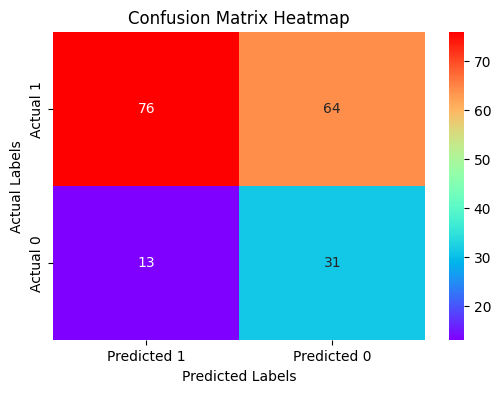

In [52]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='rainbow',
            xticklabels=['Predicted 1', 'Predicted 0'],
            yticklabels=['Actual 1', 'Actual 0'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()